In [3]:
import pandas as pd 

In [4]:
df=pd.read_csv('Cleaned_EDA.csv')

In [5]:
from sklearn.model_selection import train_test_split 
x=df.iloc[:,0:-1] 
y=df.iloc[:,-1:] 

In [6]:
y.shape

(18920, 1)

In [7]:
y = y.squeeze() 

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 

In [9]:
x_train.shape

(13244, 11)

In [10]:
y_train.shape

(13244,)

Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)   


Model Training & Evaluation

In [14]:
from sklearn.linear_model import LogisticRegression  


model = LogisticRegression(max_iter=1000)  
model.fit(x_train_scaled, y_train)  

LogisticRegression(max_iter=1000)

In [41]:
from sklearn.metrics import accuracy_score, classification_report  


y_pred = model.predict(x_test_scaled)  
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))  
print("Classification Report:\n", classification_report(y_test, y_pred))  


Logistic Regression Accuracy: 0.7684989429175476
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      4339
         1.0       0.52      0.22      0.31      1337

    accuracy                           0.77      5676
   macro avg       0.66      0.58      0.58      5676
weighted avg       0.73      0.77      0.73      5676



In [43]:
from sklearn.ensemble import RandomForestClassifier  

rf = RandomForestClassifier(n_estimators=100, random_state=42)  
rf.fit(x_train_scaled, y_train)  
y_pred_rf = rf.predict(x_test_scaled)  

from sklearn.metrics import accuracy_score  
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))  


Random Forest Accuracy: 0.768322762508809
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      4339
         1.0       0.51      0.39      0.44      1337

    accuracy                           0.77      5676
   macro avg       0.67      0.64      0.65      5676
weighted avg       0.75      0.77      0.76      5676



In [45]:
accuracy_score(y_test, y_pred_rf)*100

76.83227625088091

[Text(0.5, 0.875, 'education_level <= -0.192\ngini = 0.382\nsamples = 8373\nvalue = [9845, 3399]'),
 Text(0.25, 0.625, 'company_type <= 1.535\ngini = 0.409\nsamples = 5227\nvalue = [5839, 2341]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'city_development_index <= -1.42\ngini = 0.421\nsamples = 4600\nvalue = [5014, 2160]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'major_discipline <= 0.926\ngini = 0.295\nsamples = 627\nvalue = [825, 181]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'city_development_index <= -1.491\ngini = 0.331\nsamples = 3146\nvalue = [4006.0, 1058.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'major_discipline <= 0.926\ngini = 0.488\nsamples = 487\nvalue = [325, 443]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'enrolled_university <= -0.736\ngini = 0.245\nsamples = 2659\nvalue = 

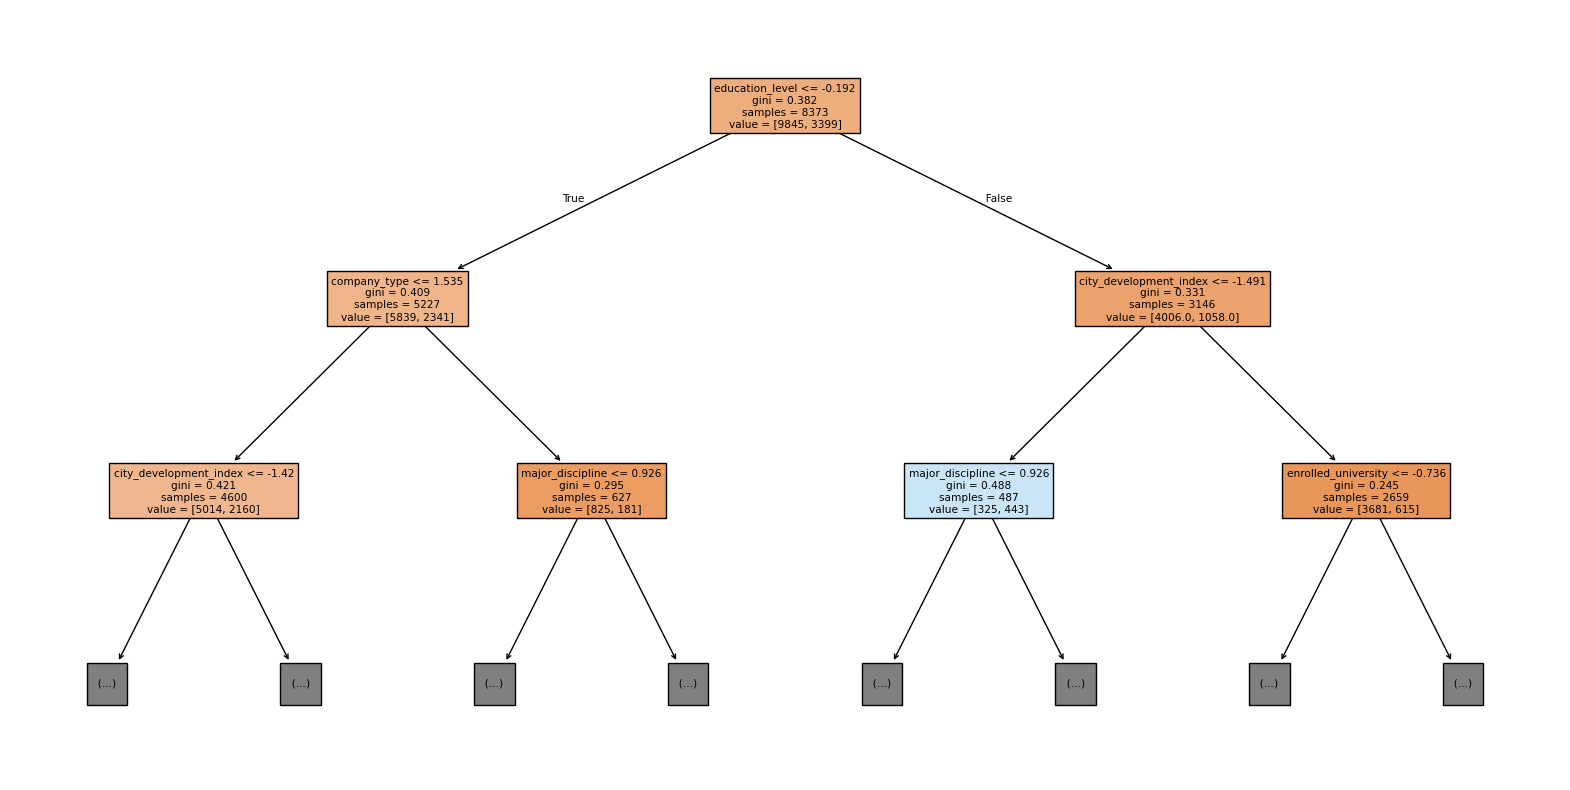

In [18]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0],feature_names=x.columns,filled=True,max_depth=2)

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb.fit(x_train_scaled, y_train)

y_pred_xgb = xgb.predict(x_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Performance:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7908738548273432
XGBoost Performance:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      4339
         1.0       0.57      0.44      0.50      1337

    accuracy                           0.79      5676
   macro avg       0.71      0.67      0.68      5676
weighted avg       0.78      0.79      0.78      5676



In [49]:
accuracy_score(y_test,y_pred_xgb)*100

79.08738548273432

In [21]:
import joblib  
joblib.dump(xgb, "xgboost_model.joblib")

['xgboost_model.joblib']